# PHASE 1: Dataset Preparation & Exploration
## COVID-19 Tweets Analysis Project

This notebook covers:
- Step 1-2: Dataset Loading & Exploration
- Step 3: Data Cleaning
- Step 4: Text Preprocessing

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1-2: Load & Explore Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/covid19_tweets.csv')

print("Dataset loaded successfully!")
print(f"\nDataset Shape: {df.shape}")
print(f"Number of tweets: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (179108, 13)
Number of tweets: 179,108
Number of columns: 13


In [3]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
# Check column information
print("\nColumn Information:")
df.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [5]:
# Check for missing values
print("\nMissing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_data)


Missing Values Analysis:
              Column  Missing Count  Missing Percentage
10          hashtags          51334               28.66
1      user_location          36771               20.53
2   user_description          10286                5.74
11            source             77                0.04


In [6]:
# Analyze date range
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("\nDate Range Analysis:")
print(f"Start Date: {df['date'].min()}")
print(f"End Date: {df['date'].max()}")
print(f"Date Range: {(df['date'].max() - df['date'].min()).days} days")


Date Range Analysis:
Start Date: 2020-07-24 23:47:08
End Date: 2020-08-30 09:07:39
Date Range: 36 days


In [7]:
# Count tweets with location data
tweets_with_location = df['user_location'].notna().sum()
location_percentage = (tweets_with_location / len(df)) * 100

print("\nLocation Data Analysis:")
print(f"Tweets with location: {tweets_with_location:,}")
print(f"Percentage: {location_percentage:.2f}%")
print(f"Tweets without location: {len(df) - tweets_with_location:,}")


Location Data Analysis:
Tweets with location: 142,337
Percentage: 79.47%
Tweets without location: 36,771



Text Length Statistics:
count    179108.000000
mean        130.517598
std          19.455022
min          13.000000
25%         131.000000
50%         140.000000
75%         140.000000
max         169.000000
Name: text_length, dtype: float64


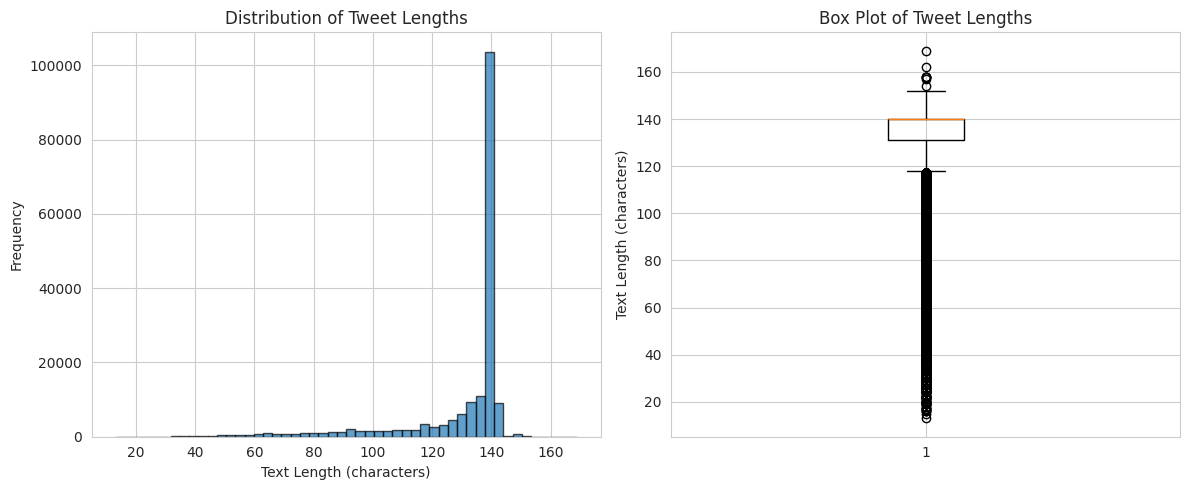

In [8]:
# Analyze text length distribution
df['text_length'] = df['text'].astype(str).apply(len)

print("\nText Length Statistics:")
print(df['text_length'].describe())

# Visualize text length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')

plt.subplot(1, 2, 2)
plt.boxplot(df['text_length'])
plt.ylabel('Text Length (characters)')
plt.title('Box Plot of Tweet Lengths')
plt.tight_layout()
plt.show()

In [9]:
# Check for duplicate tweets
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nDuplicate Tweets Analysis:")
print(f"Number of duplicate tweets: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")


Duplicate Tweets Analysis:
Number of duplicate tweets: 425
Percentage of duplicates: 0.24%


In [10]:
# Check retweet statistics
if 'is_retweet' in df.columns:
    retweet_count = df['is_retweet'].sum()
    print(f"\nRetweet Statistics:")
    print(f"Number of retweets: {retweet_count:,}")
    print(f"Percentage of retweets: {(retweet_count/len(df)*100):.2f}%")
    print(f"Original tweets: {len(df) - retweet_count:,}")


Retweet Statistics:
Number of retweets: 0
Percentage of retweets: 0.00%
Original tweets: 179,108


## Step 3: Data Cleaning

In [11]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Starting with {len(df_clean):,} tweets")

# 1. Remove duplicate tweets
df_clean = df_clean.drop_duplicates(subset=['text'], keep='first')
print(f"After removing duplicates: {len(df_clean):,} tweets")

# 2. Drop rows with empty text
df_clean = df_clean[df_clean['text'].notna()]
df_clean = df_clean[df_clean['text'].str.strip() != '']
print(f"After removing empty text: {len(df_clean):,} tweets")

# 3. Handle missing dates
df_clean = df_clean[df_clean['date'].notna()]
print(f"After removing missing dates: {len(df_clean):,} tweets")

# 4. Filter out retweets (optional - uncomment if you want to remove them)
# if 'is_retweet' in df_clean.columns:
#     df_clean = df_clean[df_clean['is_retweet'] == False]
#     print(f"After removing retweets: {len(df_clean):,} tweets")

# 5. Keep only relevant columns
relevant_columns = ['user_name', 'user_location', 'date', 'text', 'hashtags', 'source']
# Only keep columns that exist
relevant_columns = [col for col in relevant_columns if col in df_clean.columns]
df_clean = df_clean[relevant_columns]

print(f"\nFinal dataset size: {len(df_clean):,} tweets")
print(f"Reduction: {len(df) - len(df_clean):,} tweets ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")

Starting with 179,108 tweets
After removing duplicates: 178,683 tweets
After removing empty text: 178,683 tweets
After removing missing dates: 178,683 tweets

Final dataset size: 178,683 tweets
Reduction: 425 tweets (0.24%)


## Step 4: Text Preprocessing

In [12]:
# Install and import NLTK (if not already installed)
import nltk
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
except:
    print("NLTK data already downloaded")

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @mentions
    text = re.sub(r'@\w+', '', text)

    # Remove hashtag symbols but keep the word
    text = re.sub(r'#', '', text)

    # Remove special characters and punctuation (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(words)

In [14]:
# Test the preprocessing function on a sample tweet
sample_tweet = df_clean['text'].iloc[0]
print("Original Tweet:")
print(sample_tweet)
print("\nPreprocessed Tweet:")
print(preprocess_text(sample_tweet))

Original Tweet:
If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0

Preprocessed Tweet:
smelled scent hand sanitizers today someone past would think intoxicated


In [15]:
# Apply preprocessing to all tweets
print("Preprocessing all tweets... This may take a few minutes.")
df_clean['original_text'] = df_clean['text']  # Keep original for reference
df_clean['cleaned_text'] = df_clean['text'].apply(preprocess_text)

# Remove tweets that became empty after preprocessing
df_clean = df_clean[df_clean['cleaned_text'].str.strip() != '']

print(f"\nPreprocessing complete!")
print(f"Final dataset size: {len(df_clean):,} tweets")

Preprocessing all tweets... This may take a few minutes.

Preprocessing complete!
Final dataset size: 178,042 tweets


In [16]:
# Show comparison of original vs cleaned text
comparison_df = df_clean[['original_text', 'cleaned_text']].head(10)
print("\nSample of Original vs Cleaned Text:")
for idx, row in comparison_df.iterrows():
    print(f"\n--- Tweet {idx} ---")
    print(f"Original: {row['original_text'][:150]}...")
    print(f"Cleaned: {row['cleaned_text'][:150]}...")


Sample of Original vs Cleaned Text:

--- Tweet 0 ---
Original: If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0...
Cleaned: smelled scent hand sanitizers today someone past would think intoxicated...

--- Tweet 1 ---
Original: Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu...
Cleaned: hey wouldnt made sense players pay respects...

--- Tweet 2 ---
Original: @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3...
Cleaned: trump never claimed covid hoax claim effort...

--- Tweet 3 ---
Original: @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW...
Cleaned: one gift covid give appreciation simple things always around...

--- Tweet


Cleaned Text Statistics:
Average text length: 68.82 characters
Average word count: 9.43 words
Median word count: 10 words


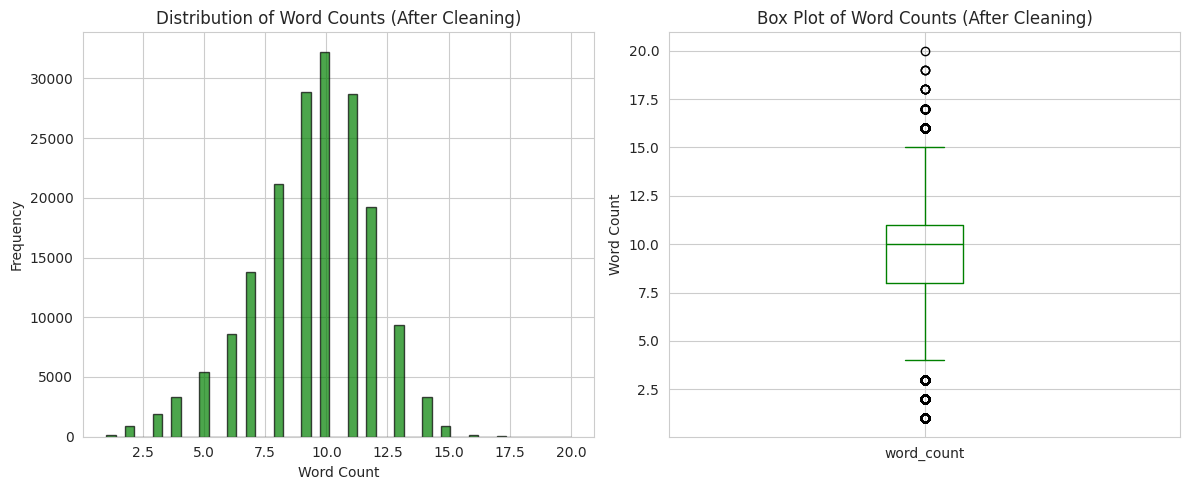

In [17]:
# Calculate statistics on cleaned text
df_clean['cleaned_text_length'] = df_clean['cleaned_text'].apply(len)
df_clean['word_count'] = df_clean['cleaned_text'].apply(lambda x: len(x.split()))

print("\nCleaned Text Statistics:")
print(f"Average text length: {df_clean['cleaned_text_length'].mean():.2f} characters")
print(f"Average word count: {df_clean['word_count'].mean():.2f} words")
print(f"Median word count: {df_clean['word_count'].median():.0f} words")

# Visualize word count distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_clean['word_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts (After Cleaning)')

plt.subplot(1, 2, 2)
df_clean['word_count'].plot(kind='box', color='green')
plt.ylabel('Word Count')
plt.title('Box Plot of Word Counts (After Cleaning)')
plt.tight_layout()
plt.show()

## Save Cleaned Dataset

In [19]:
# Save the cleaned dataset
output_path = 'covid19_tweets_cleaned.csv'
df_clean.to_csv(output_path, index=False)

print(f"\nCleaned dataset saved successfully to: {output_path}")
print(f"Total tweets saved: {len(df_clean):,}")
print(f"Columns saved: {list(df_clean.columns)}")


Cleaned dataset saved successfully to: covid19_tweets_cleaned.csv
Total tweets saved: 178,042
Columns saved: ['user_name', 'user_location', 'date', 'text', 'hashtags', 'source', 'original_text', 'cleaned_text', 'cleaned_text_length', 'word_count']


In [21]:

print(f"\nOriginal dataset: {len(df):,} tweets")
print(f"Cleaned dataset: {len(df_clean):,} tweets")
print(f"Reduction: {len(df) - len(df_clean):,} tweets")
print(f"\nData saved to: {output_path}")



Original dataset: 179,108 tweets
Cleaned dataset: 178,042 tweets
Reduction: 1,066 tweets

Data saved to: covid19_tweets_cleaned.csv
